In [1]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#tp = plot_pc_graph_tikz(est_g, [String(k) for k in keys(df)])


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(Graphs.SimpleGraphs.SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.68636008, 0.03002659))

In [2]:
est_g

{5, 7} directed simple Int64 graph

In [3]:
using Plots, GraphRecipes

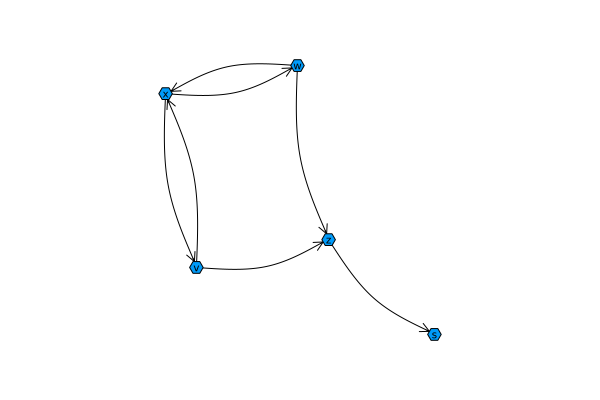

In [4]:

graphplot(est_g, names= [String(k) for k in keys(df)])

In [5]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)


(x = [0.06193274031408013, 0.2784058141640002, -0.5958244153640522, 0.04665938957338174, 1.0857940215432762, -1.5765649225859841, 0.1759399913010747, 0.8653808054093252, -2.790281005549307, -1.8920155582259128  …  -1.172869224619136, 0.9218177694319407, -0.46060170839179715, -0.9424506066689221, -0.6683350146660898, 1.13376245295865, 0.16017123470193892, 1.2035494780696616, -0.25218914788914293, 1.121665998910078], v = [-0.09250182220418984, 0.5675980897652538, -0.7140918730993022, -0.13985185939667483, 0.8654191143982632, -1.6179414873956435, 0.5908944698407181, 0.9484675082849228, -2.5323640793803697, -1.7979777572444016  …  -1.0046444212595644, 1.1717910105198648, -0.49022308208890647, -1.5455988844258108, -0.5526962435107993, 1.141418378235226, 0.8364713487518959, 1.1029217963545608, -0.5302228268986705, 1.1264197190628773], w = [0.36578689835494893, 0.8410329130812975, -0.8534652870632888, -0.2624374783168834, 0.8651710876085588, -1.3083709949188083, -0.07268315253075378, 1.250996

In [6]:
est_g, score = ges(df; penalty=1.0, parallel=true)


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(Graphs.SimpleGraphs.SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.165727423, 0.000135753))

In [7]:
print(est_g)

Graphs.SimpleGraphs.SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]])

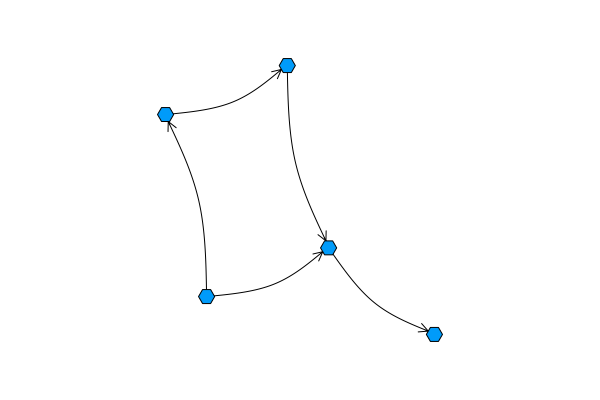

In [8]:
graphplot(pdag2dag!(est_g))

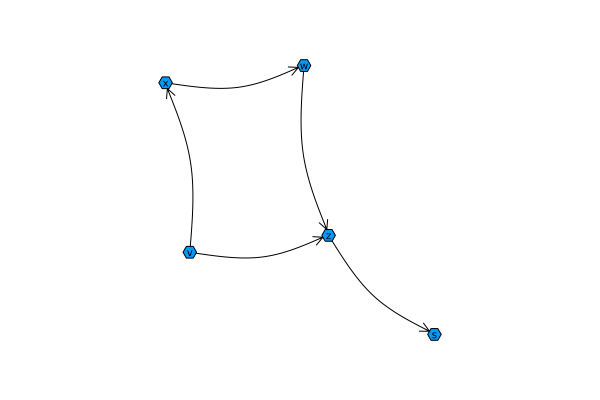

In [9]:
graphplot(est_g, names= [String(k) for k in keys(df)])

In [10]:
display(estimate_equations(df,est_g))

UndefVarError: UndefVarError: `estimate_equations` not defined

In [11]:
display(estimate_equations(df,est_g))

UndefVarError: UndefVarError: `estimate_equations` not defined

## With Actual Data

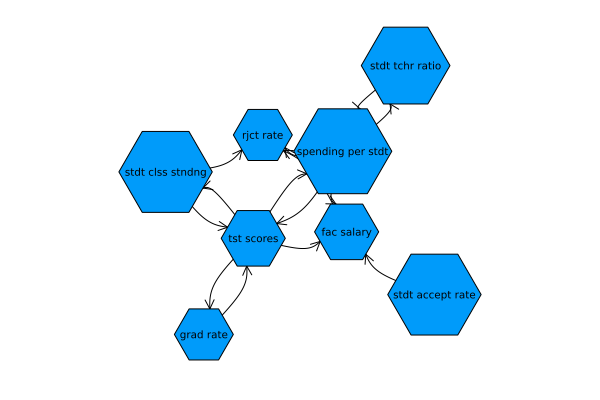

In [12]:
using HTTP, CSV, DataFrames
using CausalInference
using TikzGraphs
# If you have problems with TikzGraphs.jl, 
# try alternatively plotting backend GraphRecipes.jl + Plots.jl
# and corresponding plotting function `plot_pc_graph_recipes`

url = "https://www.ccd.pitt.edu//wp-content/uploads/files/Retention.txt"

df = DataFrame(CSV.File(HTTP.get(url).body))

# for now, pcalg and fcialg only accepts Float variables...
# this should change soon hopefully
for name in names(df)
	df[!, name] = convert(Array{Float64,1}, df[!,name])
end

# make variable names a bit easier to read
variables = map(x->replace(x,"_"=>" "), names(df))

est_g = pcalg(df, 0.025, gausscitest)

graphplot(est_g, names= variables)

In [13]:
ENV["LINES"] = 100
ENV["COLUMNS"] = 1000


1000

In [14]:
est_dag= pdag2dag!(est_g)

{8, 10} directed simple Int64 graph

In [15]:
display(estimate_equations(df,est_dag))

UndefVarError: UndefVarError: `estimate_equations` not defined

In [16]:
display(estimate_equations(df,est_g))

UndefVarError: UndefVarError: `estimate_equations` not defined

In [17]:
display(estimate_equations_test(df,est_g))

UndefVarError: UndefVarError: `estimate_equations_test` not defined

In [18]:
display(estimate_equations(df,est_g))

UndefVarError: UndefVarError: `estimate_equations` not defined

In [19]:
simplecyclescount(est_g)

UndefVarError: UndefVarError: `simplecyclescount` not defined

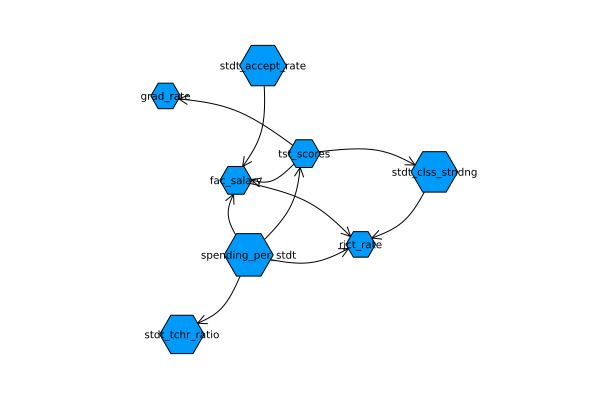

In [20]:
graphplot(est_g, names= names(df), nodesize=0.05)

In [21]:
display(estimate_equations(df,est_g))

UndefVarError: UndefVarError: `estimate_equations` not defined

In [22]:
scm= estimate_equations(df,est_g)

UndefVarError: UndefVarError: `estimate_equations` not defined

### Testing cycles

In [23]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

# Create a DataFrame from the named tuple df
df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#est_g= pdag2dag!(est_g)

estimate_equations(df, est_g)

┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


UndefVarError: UndefVarError: `estimate_equations` not defined

In [24]:
# Overload graphplot for SCM
function GraphRecipes.graphplot(scm::SCM; kwargs...)
    GraphRecipes.graphplot(scm.dag; kwargs...)
end

UndefVarError: UndefVarError: `SCM` not defined

In [25]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

est_g= pdag2dag!(est_g)

estimate_equations(df, est_g)


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


UndefVarError: UndefVarError: `estimate_equations` not defined

In [26]:
is_cyclic(est_g)

UndefVarError: UndefVarError: `is_cyclic` not defined

### estimating equations scm

In [27]:
display(estimate_equations(df, est_g))

UndefVarError: UndefVarError: `estimate_equations` not defined

In [28]:
scm = estimate_equations_test(df, est_g)

UndefVarError: UndefVarError: `estimate_equations_test` not defined

In [29]:
scm.variables

UndefVarError: UndefVarError: `scm` not defined

In [30]:
scm.coefficients

UndefVarError: UndefVarError: `scm` not defined

In [31]:
df=DataFrame(df)

Row,x,v,w,z,s
,Float64,Float64,Float64,Float64,Float64
1,0.0619327,-0.0925018,0.365787,0.00585492,-0.330166
2,0.278406,0.567598,0.841033,1.90745,2.08259
3,-0.595824,-0.714092,-0.853465,-1.66625,-2.00072
4,0.0466594,-0.139852,-0.262437,-0.724986,-0.864001
5,1.08579,0.865419,0.865171,1.2846,1.03755
6,-1.57656,-1.61794,-1.30837,-2.96285,-2.61467
7,0.17594,0.590894,-0.0726832,0.484619,0.490356
8,0.865381,0.948468,1.251,2.22934,2.23827
9,-2.79028,-2.53236,-2.60523,-5.07867,-5.04167


In [32]:
df_generated= generate_data(scm, 2000)


UndefVarError: UndefVarError: `generate_data` not defined

In [34]:
mean(df_generated[!,"v"])

UndefVarError: UndefVarError: `df_generated` not defined

In [35]:
mean(df[!,"v"])

UndefVarError: UndefVarError: `mean` not defined

In [36]:
std(df_generated[!,"v"])

UndefVarError: UndefVarError: `df_generated` not defined

In [37]:
std(df[!,"v"])

UndefVarError: UndefVarError: `std` not defined

In [38]:
graphplot(scm.dag,  names= names(df), nodesize=0.5)

UndefVarError: UndefVarError: `scm` not defined

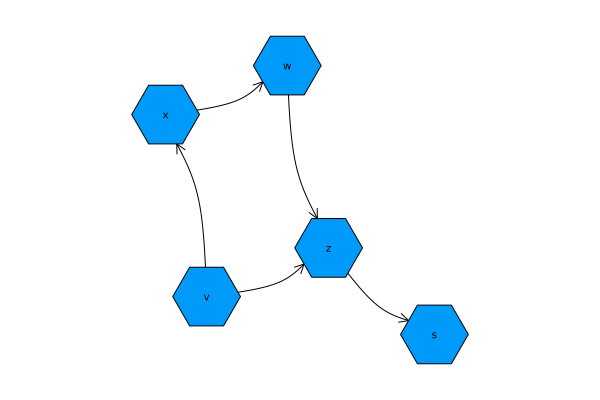

In [39]:
graphplot(est_g,  names= names(df), nodesize=0.5)

In [40]:
graphplot(scm)

UndefVarError: UndefVarError: `scm` not defined